In [1]:
# этот скрипт получает данные из cryptocompare и анализирует их. ислользовался преимущественно для поиска
# больших всплесков объемов(закупов)
# первая версия подобного кода в файле fast_analyze

In [1]:
import requests
import hashlib
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
from scipy import stats

In [2]:
import numpy as np
from bittrex import Bittrex
bittrex = Bittrex(None, None)
market_names = []

sumary = bittrex.get_market_summaries()

for i in sumary.get('result'):
    market_names.append(i.get('MarketName')) # получить названия монет для обращения к cryptocompare

In [3]:
names = []
for i in market_names:
    if i[0:3] == 'BTC':
        names.append(i[4:]) # получить "чистые" названия монет
        

del names[16] # что-то с этими именами было не так, вроде разница bcc и bch 
del names[36] #

In [4]:
urls = []
for i in names:
    u = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=BTC&limit=85&e=BitTrex'
    urls.append(u)

In [49]:
urls1 = []
for i in names:
    u = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym='+i+'&tsyms=BTC&ts=1508803200&e=BitTrex'
    urls1.append(u)

In [50]:
urls2 = []
for i in names:
    u = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym='+i+'&tsyms=BTC&ts=1508810400&e=BitTrex'
    urls2.append(u)

In [8]:
# в этом случае я вычислял разницу средних значений за какой-то период 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'
}

for u in urls:
    
    r = requests.get(u, headers=headers)

    dff = pd.DataFrame(r.json()['Data'])

    df = dff


    try:
        
        diff = df['close'][-15:].mean() / df['close'][:15].mean()
        #diff_vol = df['volumeto'][-15:].mean() / df['volumeto'][:15].mean()
    except:
        pass
    
    if diff >= 1.13:
        
        try:
            
            print (names[urls.index(u)])
            print ('vol', df['volumeto'].mean(), df['volumeto'].max())
            print ('price', df['close'][:10].mean(), df['close'][-10:].mean(), diff)
        except: 
            pass
        

    #zval = stats.zscore(df['volumeto'])   а здесь вычистял z-value для поиска выбросов


    #print (df.loc[:10]['time'])
    #print (stats.zscore(df['volumeto']))
    #plt.ylabel(names[urls.index(u)])
    #plt.plot(df['close'])
    #plt.show()
    #plt.plot(df['volumeto'])
    #plt.show()
    #plt.plot(zval)
    #plt.show()
    
    
    ###############################################  в конце ноутбука будет ещё важный код. всё что до него - 
    ###############################################  подготовка данных и отладка

ABY
vol 0.03868390697674417 0.5024
price 3.5599999999999996e-07 4.0199999999999997e-07 1.135338345864662
AID
vol 1.6818663023255813 59.14
price 9.792e-06 1.2712000000000001e-05 1.2680496792684592
BLT
vol 1.2331797441860466 53.08
price 1.7310000000000002e-05 2.0288e-05 1.1556457849961328
BRK
vol 0.1815938255813953 4.01
price 8.186000000000001e-06 1.0067999999999999e-05 1.252775057133529
BRX
vol 0.022872683720930233 0.8517
price 3.532300000000001e-05 4.4815e-05 1.214633875122783
BSD
CRB
vol 0.10191242558139536 4.09
price 5.2260000000000004e-06 6.262e-06 1.1826973340303184
DTB
vol 0.2717361244186046 11.94
price 3.1280999999999994e-05 3.744900000000001e-05 1.241988114532685
ERC
vol 0.1739647093023256 5.83
price 2.5300000000000002e-05 2.5911999999999995e-05 1.1457694870086605


KeyboardInterrupt: 

0.008407434883720932 0.1114


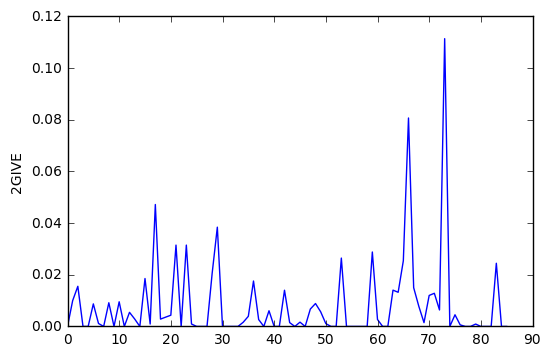

0.03868390697674417 0.5024


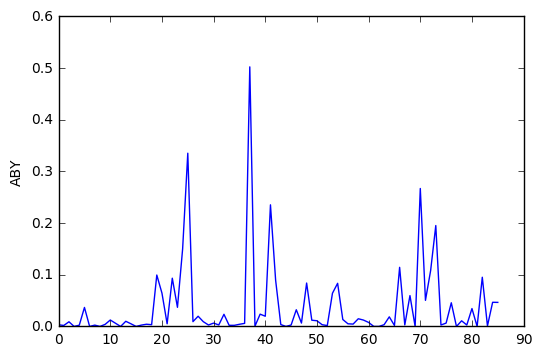

8.505406976744187 78.74


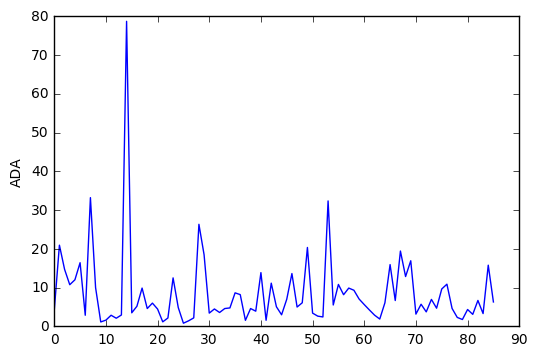

0.43283511046511636 5.59


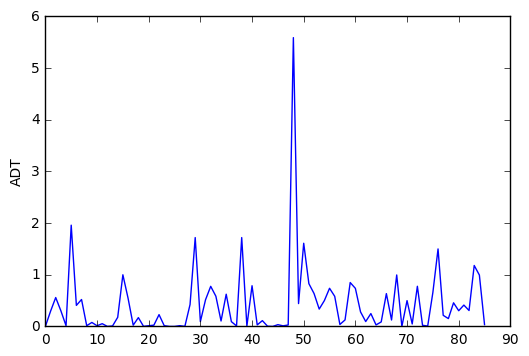

0.19871516767441857 2.15


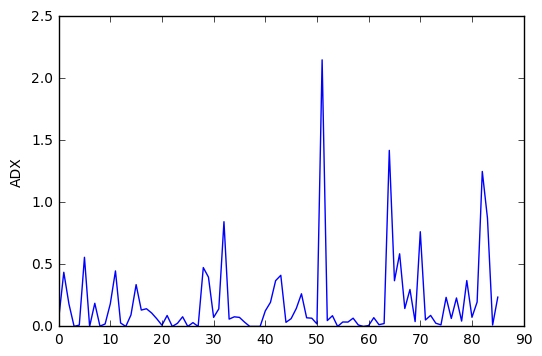

0.029565683720930224 0.5934


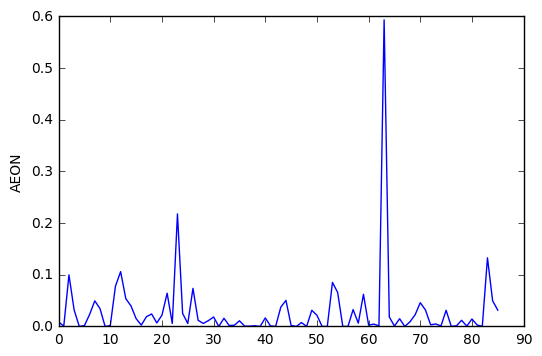

1.6818663023255813 59.14


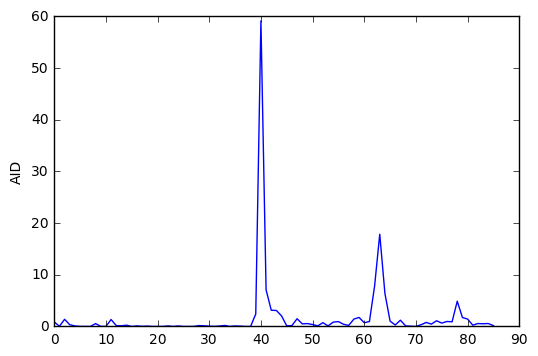

KeyboardInterrupt: 

In [9]:
# визуализация изменений объемов альткоинов
for u in urls:
    r = requests.get(u)
    df = pd.DataFrame(r.json()['Data'])
    print (df['volumeto'].mean(), df['volumeto'].max())
    #print (stats.zscore(df['volumeto']))
    plt.ylabel(names[urls.index(u)])
    plt.plot(df['volumeto'])
    plt.show()

3.477012462686569 35.22
28844.944825870665 232311.81


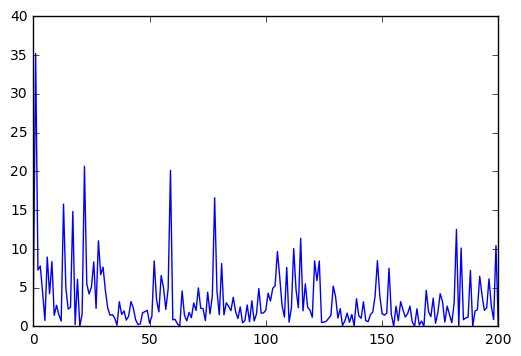

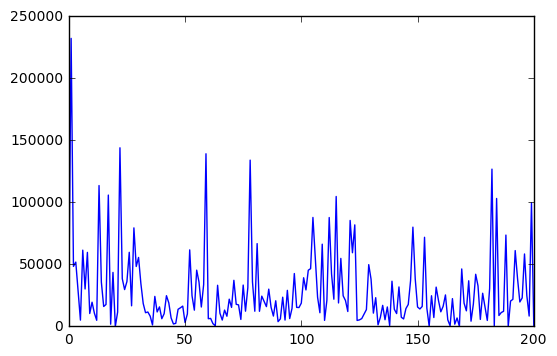

In [14]:
# отрисовка объема покупок (volumeto) и объема продаж (volumefrom) по монете(указывается в переменной u, fsym)

u = 'https://min-api.cryptocompare.com/data/histohour?fsym=SHIFT&tsym=BTC&limit=200&aggregate=3&e=CCCAGG'
r = requests.get(u)
dff = pd.DataFrame(r.json()['Data'])
df = dff

print (df['volumeto'].mean(), df['volumeto'].max())
print (df['volumefrom'].mean(), df['volumefrom'].max())

#print (stats.zscore(df['volumeto']))
#plt.ylabel(names[urls.index(u)])
plt.plot(df['volumeto'])
plt.show()
plt.plot(df['volumefrom'])
plt.show()

In [3]:
%cd fast_dump/
dump = os.listdir()
dump.sort()
del dump[-5:]

/home/me/soft/other/python-bittrex-master/bittrex/fast_dump


In [60]:
# скользящее окно для поиска изменений объёма
a = pd.read_csv(dump[-1])
b = pd.read_csv(dump[-8])
for i in range(261):
    if a['BaseVolume'][i] / b['BaseVolume'][i] >= 1.05:
        print (a['MarketName'][i], a['BaseVolume'][i], b['BaseVolume'][i])

BTC-INFX 23.36272649 18.41010851
BTC-LGD 322.03001838 304.03189836
BTC-MLN 87.09561847 78.80295467
BTC-TKS 126.1874433 117.98946764
BTC-UNO 6.62748928 5.52798727
BTC-XVC 1.9617599 1.82316929
BTC-ZCL 41.54514264 39.22799731
ETH-NMR 701.9319051 664.42083766


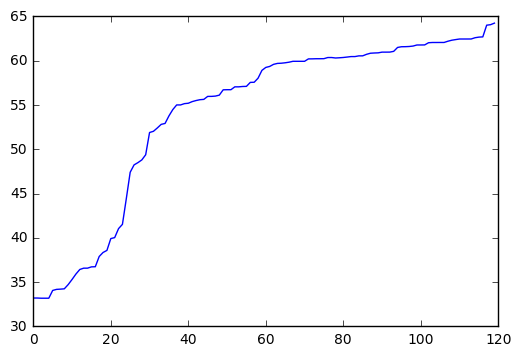

In [16]:
# отрисовка изменений объема
v = []
d = dump[-120:]  # изменения объема за последние 120 минут
for i in d:
    a = pd.read_csv(i)
    v.append(a['BaseVolume'][131])   # 131 - номер монеты в снапшотах
    
plt.plot(v)
plt.show()

In [179]:
mostly_interesting = ['SPHR', 'DRACO', 'EXP', 'PKB', 'TRUST', 'VTC']
int_urls = []
for i in mostly_interesting:
    u = 'https://min-api.cryptocompare.com/data/histominute?fsym='+i+'&tsym=BTC&limit=500&e=BitTrex'
    int_urls.append(u)

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=18, tm_min=53, tm_sec=53, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.032595648502994026 3.7
price 0.0004540999999999999 0.0005456000000000001 1.2014974675181684


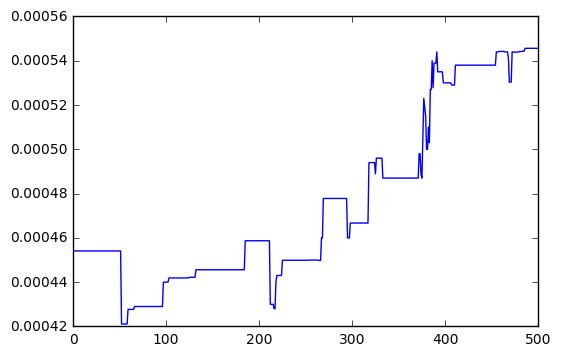

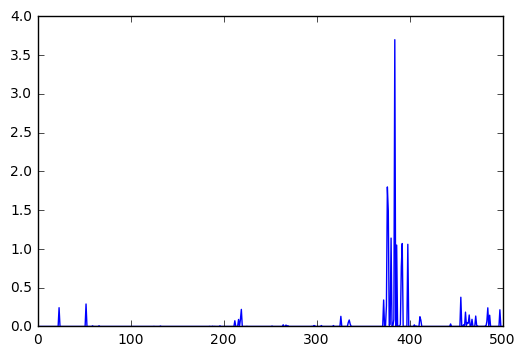

DRACO
vol 0.02346895299401198 0.8235
price 4.249e-06 4.5550000000000004e-06 1.0698731004229982


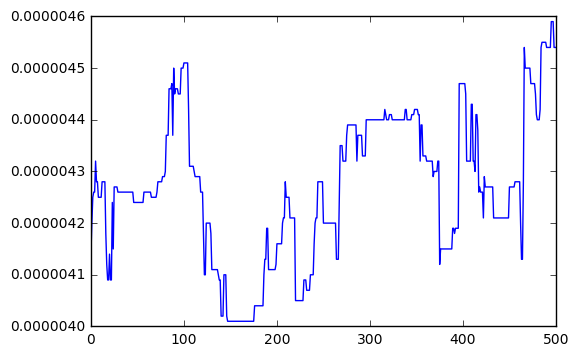

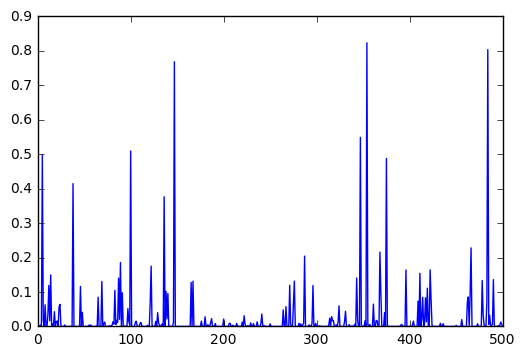

EXP
vol 0.22126485528942108 7.87
price 0.0004466 0.0004844800000000001 1.0789049438738951


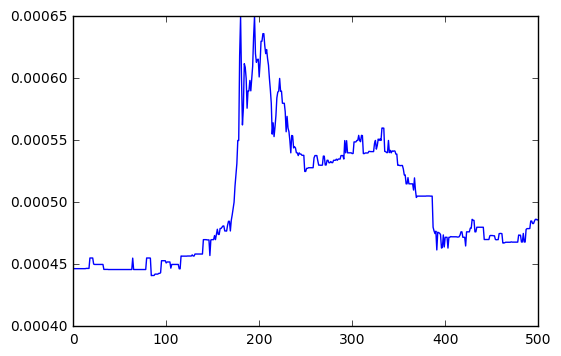

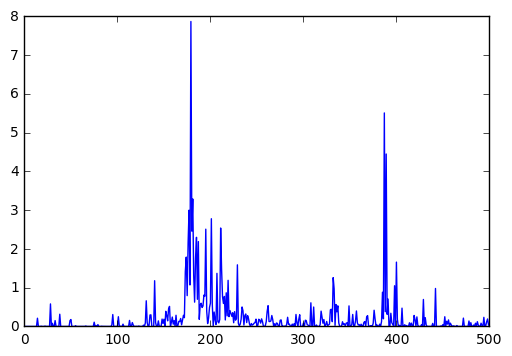

PKB
vol 0.043804500099800414 0.9689
price 7.270999999999999e-05 7.306000000000001e-05 1.0160682367541234


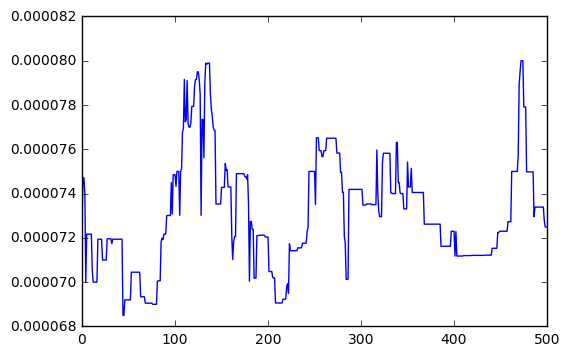

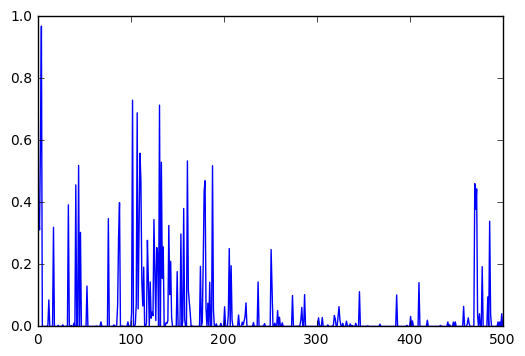

TRUST
vol 0.00793017337325349 1.2
price 9.83e-06 1.0980000000000002e-05 1.1150592216582065


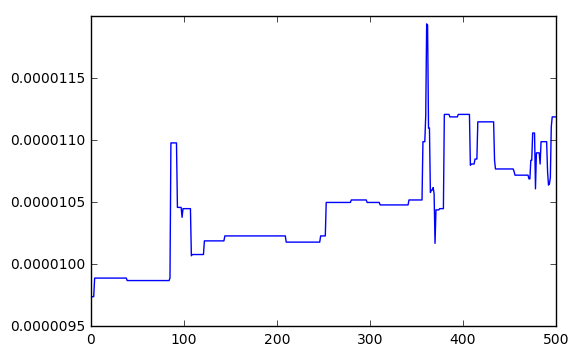

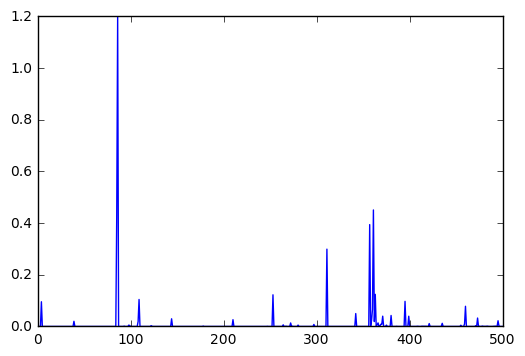

VTC
vol 0.13106814241516956 6.71
price 0.00011522 0.00013435 1.1704144748251346


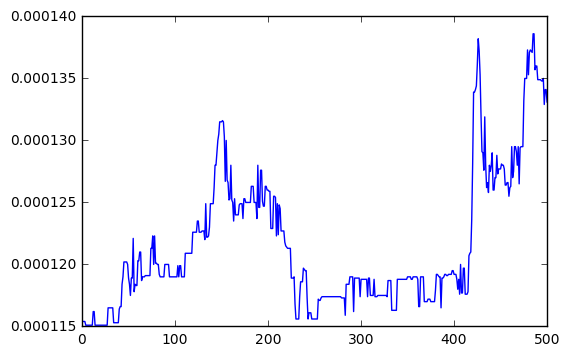

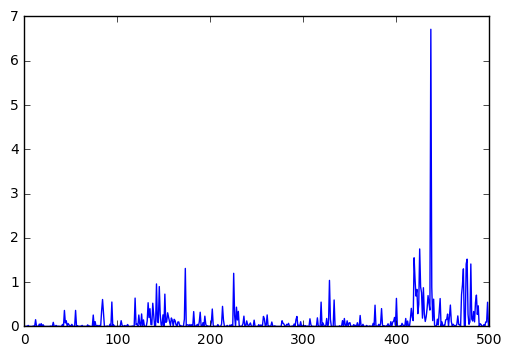

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=4, tm_sec=2, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.033828301197604806 3.7
price 0.0004540999999999999 0.00053485 1.1857006533069079


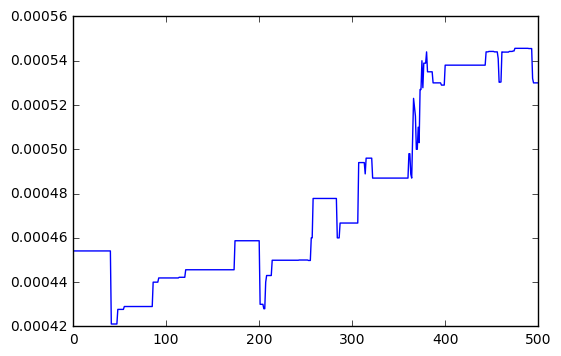

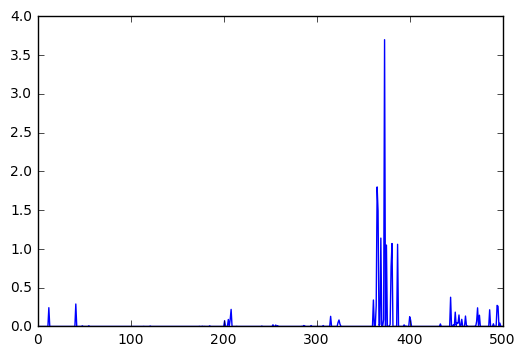

DRACO
vol 0.02246515465069861 0.8235
price 4.199e-06 4.544e-06 1.0853095654941907


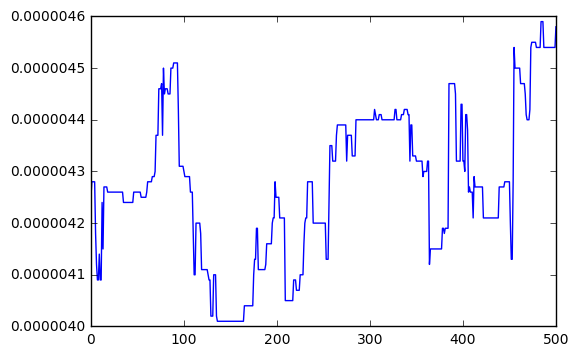

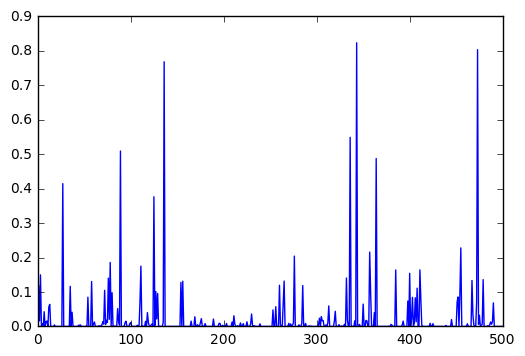

EXP
vol 0.22174369760479035 7.87
price 0.00044926000000000005 0.0004894599999999999 1.086039033209348


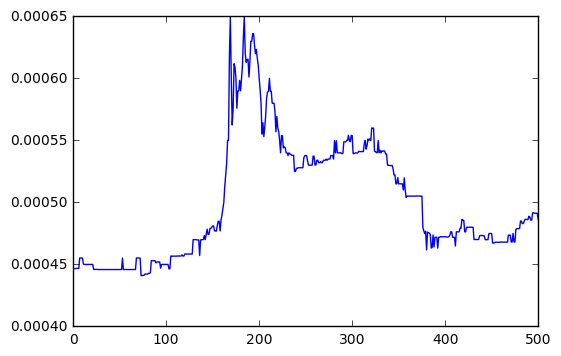

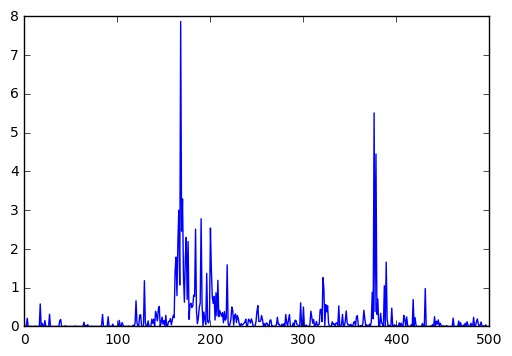

PKB
vol 0.03892858992015968 0.73
price 7.082600000000002e-05 7.4408e-05 1.0410261229092272


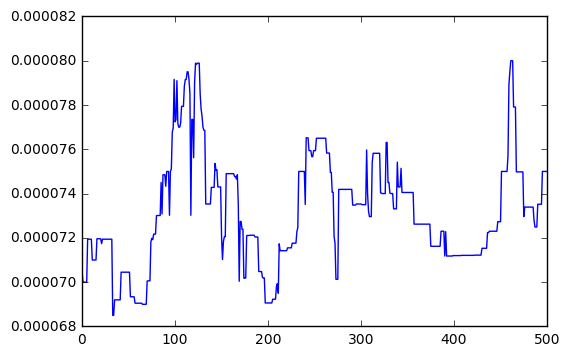

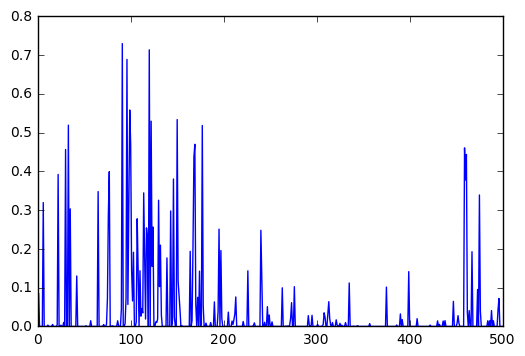

TRUST
vol 0.007794624471057882 1.2
price 9.89e-06 1.0685999999999999e-05 1.0974721941354904


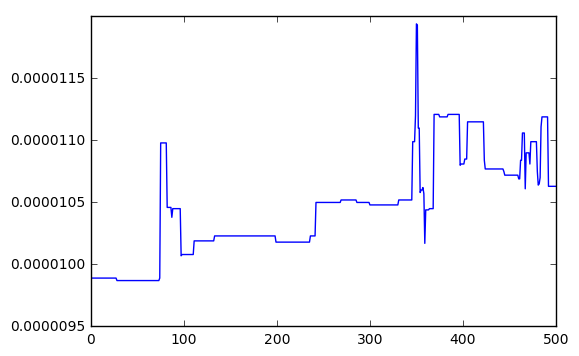

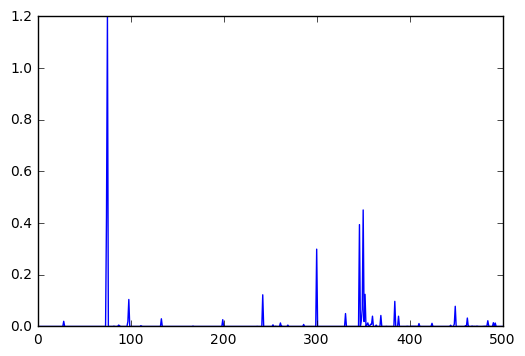

VTC
vol 0.13367114960079834 6.71
price 0.00011532 0.00013188 1.151443281078267


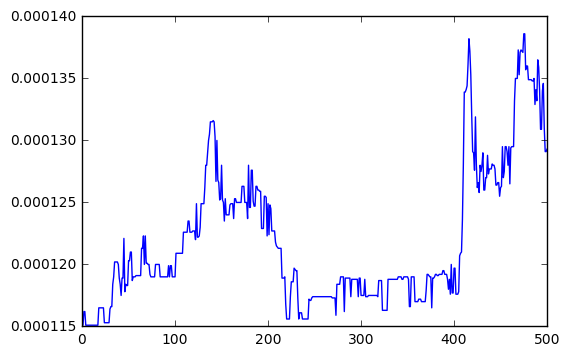

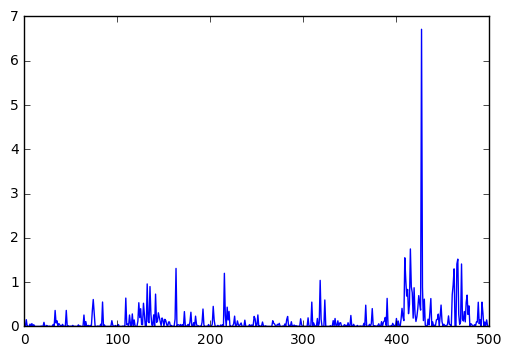

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=14, tm_sec=8, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.03388616946107786 3.7
price 0.0004540999999999999 0.0005356 1.177420538794686


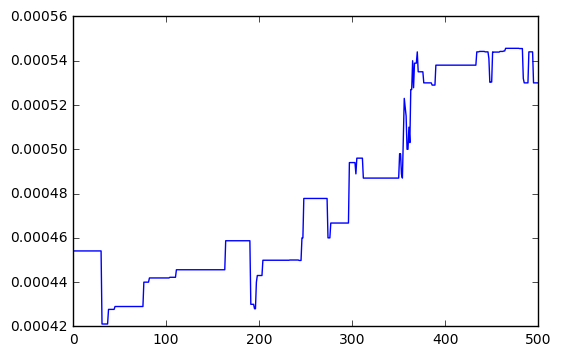

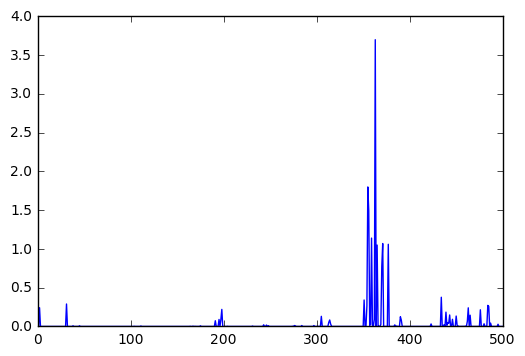

DRACO
vol 0.023199204550898214 0.8235
price 4.217e-06 4.528e-06 1.0731054041279342


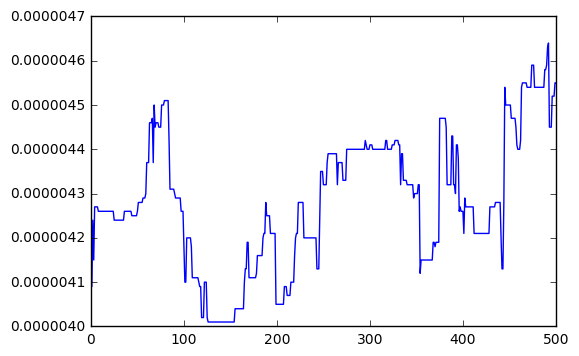

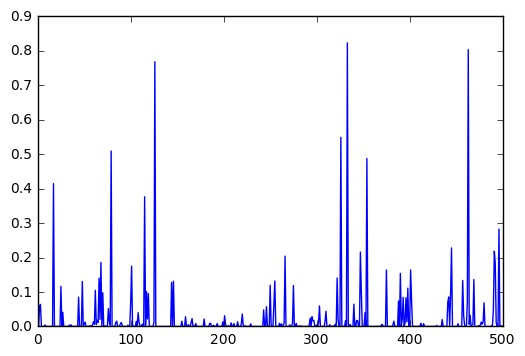

EXP
vol 0.22138860518962064 7.87
price 0.0004505499999999999 0.00048829 1.0867946911841033


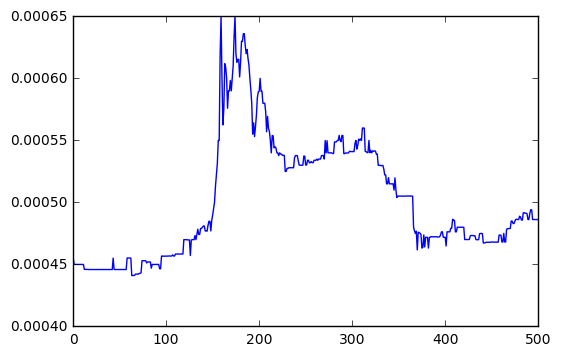

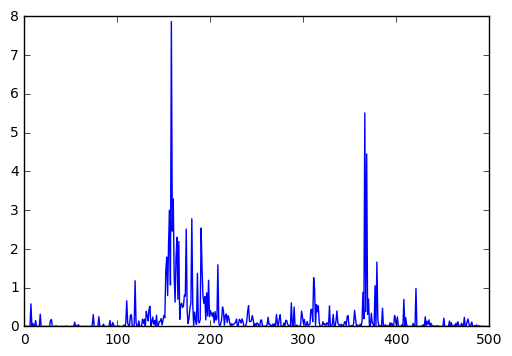

PKB
vol 0.038964577944111775 0.73
price 7.147800000000001e-05 7.3278e-05 1.0297402960067015


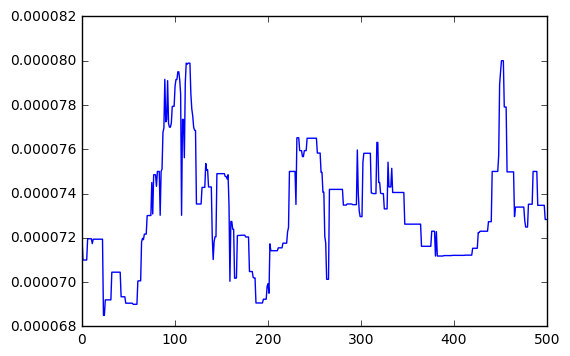

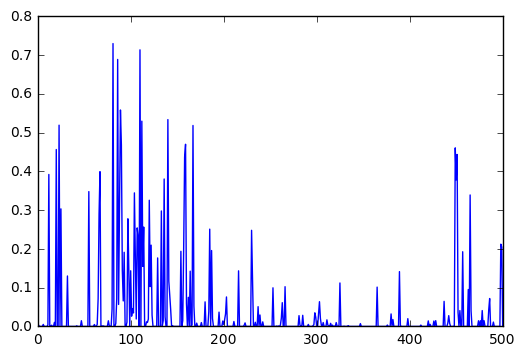

TRUST
vol 0.008601365189620755 1.2
price 9.89e-06 1.0958e-05 1.0969329288843945


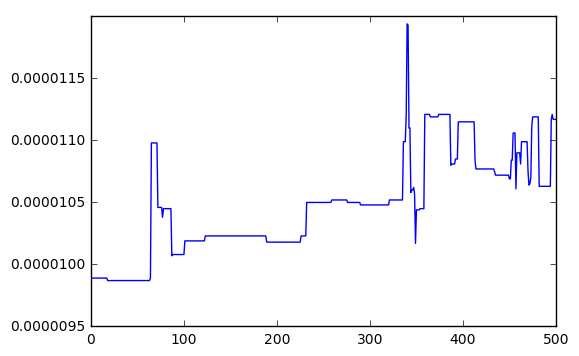

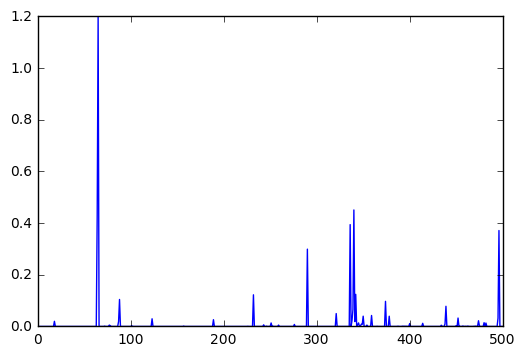

VTC
vol 0.13835411167664668 6.71
price 0.00011538000000000002 0.00012691999999999998 1.1079476687222636


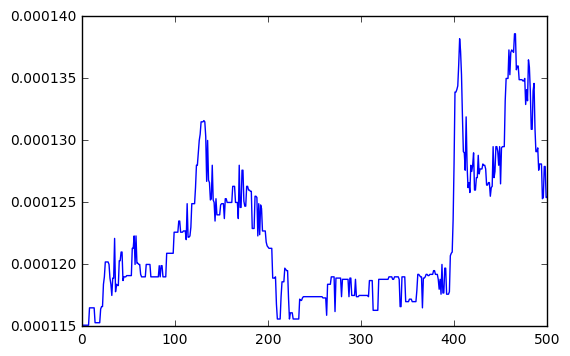

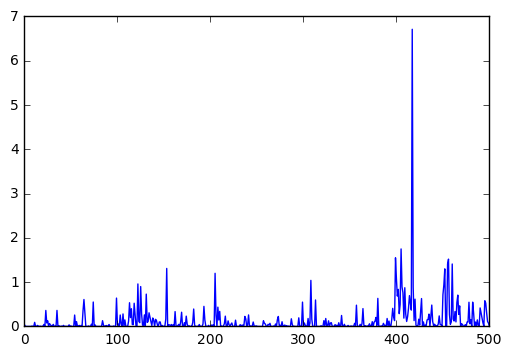

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=24, tm_sec=15, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.03364507365269462 3.7
price 0.0004540999999999999 0.0005292999999999999 1.1661161271379288


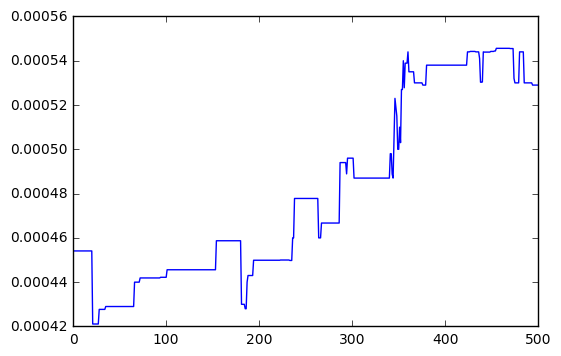

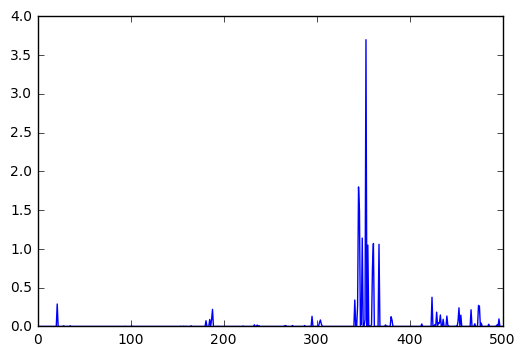

DRACO
vol 0.03031997960079842 2.06
price 4.260000000000001e-06 4.853e-06 1.1150234741784033


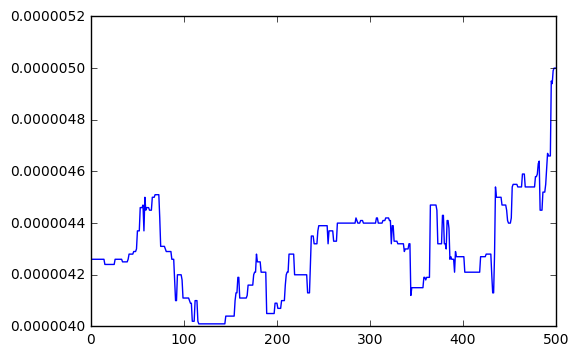

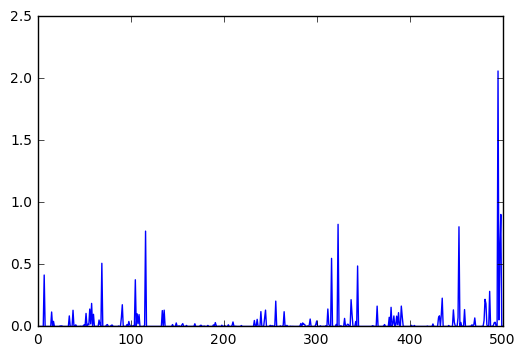

EXP
vol 0.22009515389221548 7.87
price 0.00044677 0.00048812000000000004 1.0926805232037269


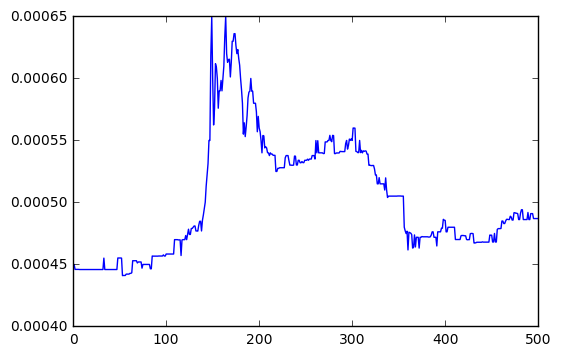

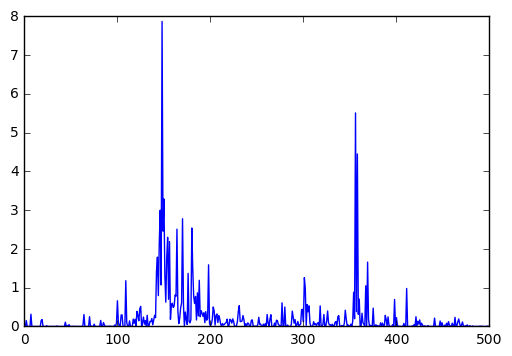

PKB
vol 0.039582214670658686 0.73
price 7.192200000000001e-05 7.249999999999999e-05 1.0166131860751462


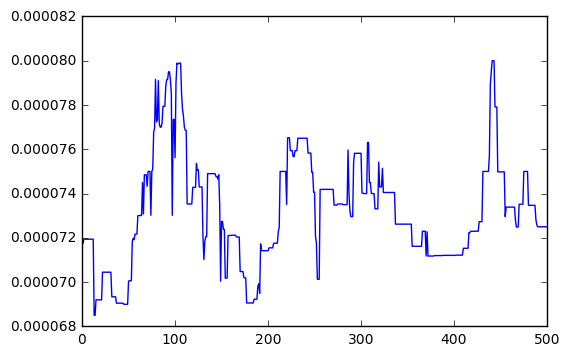

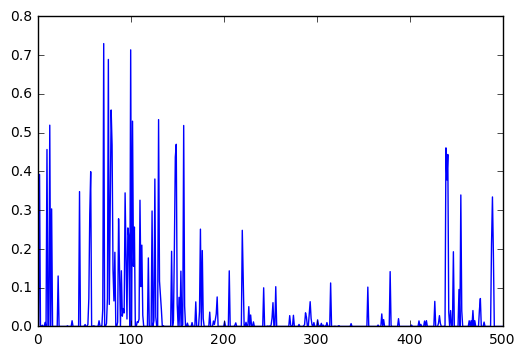

TRUST
vol 0.008775221876247503 1.2
price 9.886e-06 1.1343e-05 1.1433101680048576


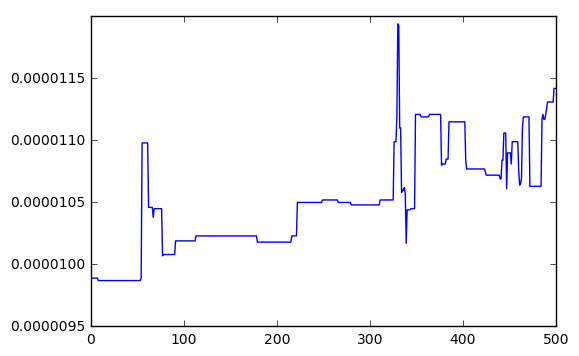

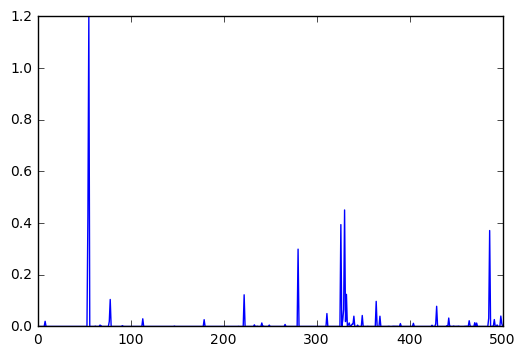

VTC
vol 0.13894462065868257 6.71
price 0.00011578 0.00012638 1.0894085281980743


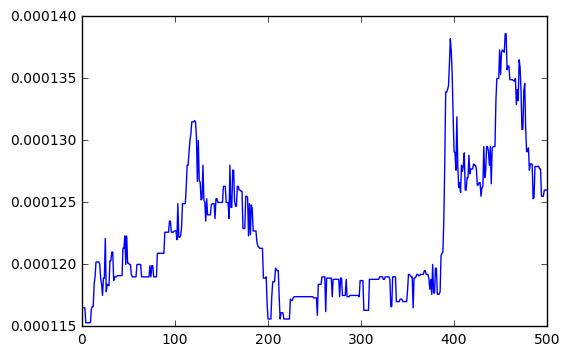

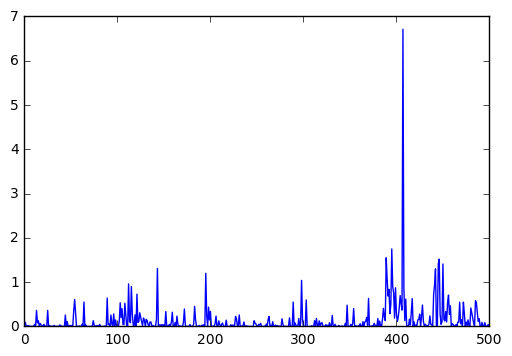

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=34, tm_sec=22, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.03369449481037925 3.7
price 0.0004540999999999999 0.000529 1.1879631708960254


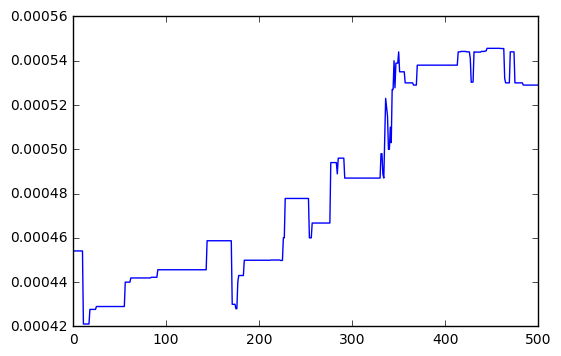

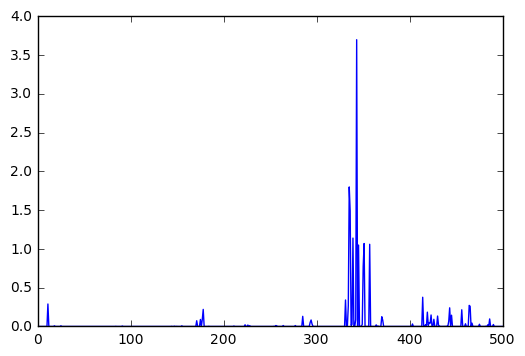

DRACO
vol 0.030052877405189637 2.06
price 4.25e-06 4.746000000000001e-06 1.1364207221350078


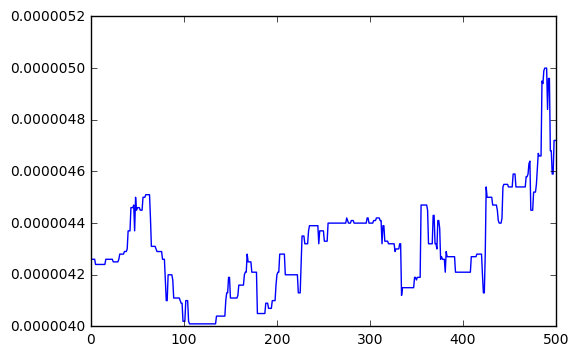

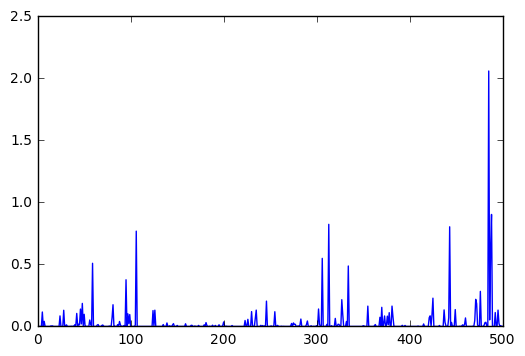

EXP
vol 0.21923760499001985 7.87
price 0.00044590000000000005 0.0004898600000000001 1.0964491291021905


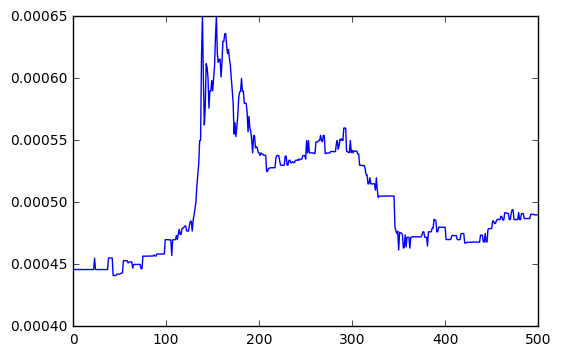

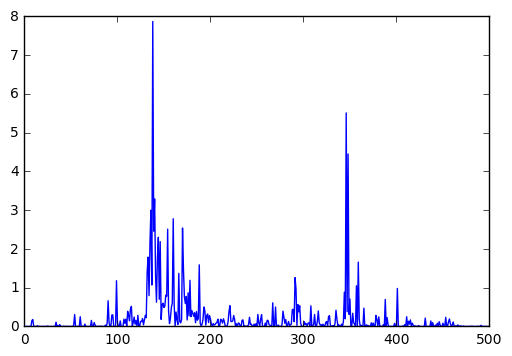

PKB
vol 0.03897542025948102 0.73
price 6.988199999999999e-05 7.249999999999999e-05 1.0371267535786832


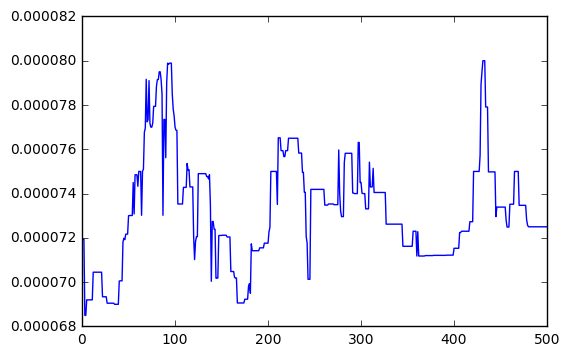

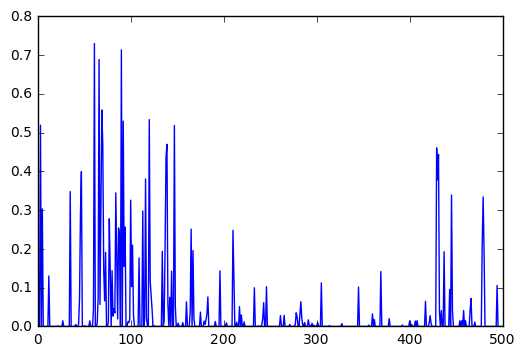

TRUST
vol 0.009553375568862274 1.2
price 9.87e-06 1.1459999999999999e-05 1.1582573454913878


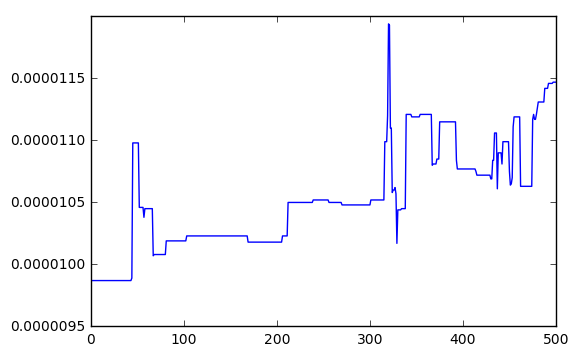

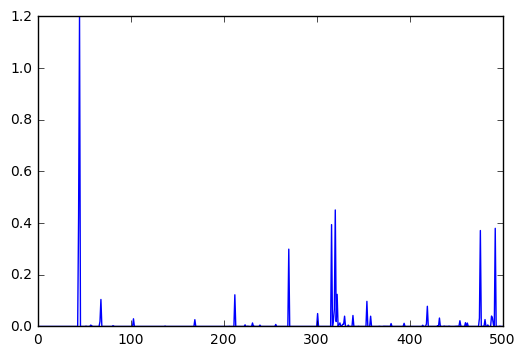

VTC
vol 0.1408527324351297 6.71
price 0.00011878 0.00012715 1.067737587059088


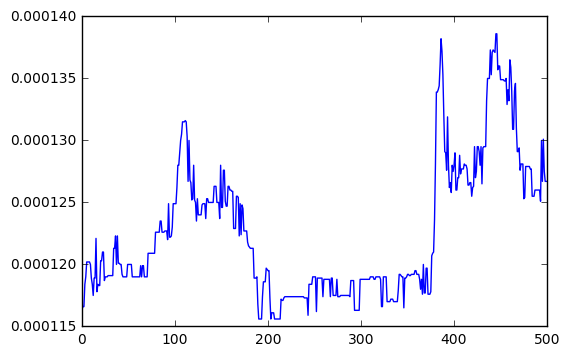

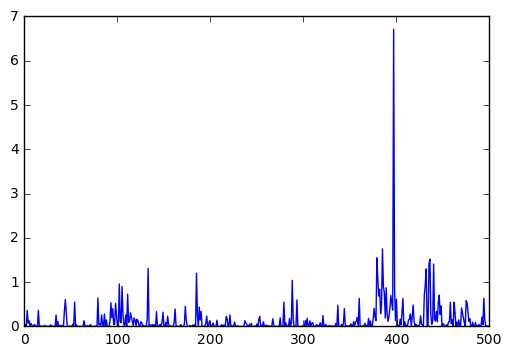

KeyboardInterrupt: 

In [188]:
# этот код раз в 10 минут отрисовывал данные(цена закрытия и объем) по наиболее интересным монетам.
while 1:
    
    print (time.localtime())
    for u in int_urls:

        r = requests.get(u)

        df = pd.DataFrame(r.json()['Data'])

        diff = df['close'][-15:].mean() / df['close'][:15].mean()

        print (mostly_interesting[int_urls.index(u)])
        print ('vol', df['volumeto'].mean(), df['volumeto'].max())
        print ('price', df['close'][:10].mean(), df['close'][-10:].mean(), diff)


        plt.plot(df['close'])
        plt.show()
        plt.plot(df['volumeto'])
        plt.show()
    
    time.sleep(600)

In [189]:
int_urls_h = []
for i in mostly_interesting:
    u = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=BTC&limit=120&e=BitTrex'
    int_urls_h.append(u)

SPHR
vol 1.4338171876033055 19.45
price 0.00046702 0.00048632 1.0561072199072021


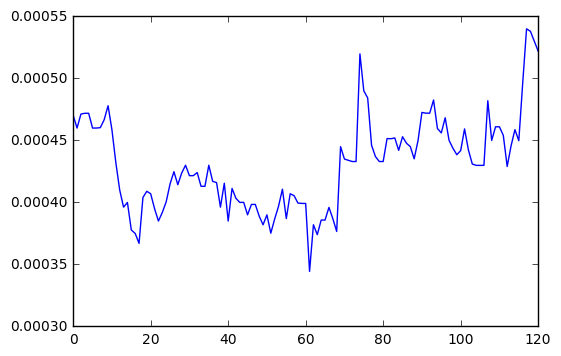

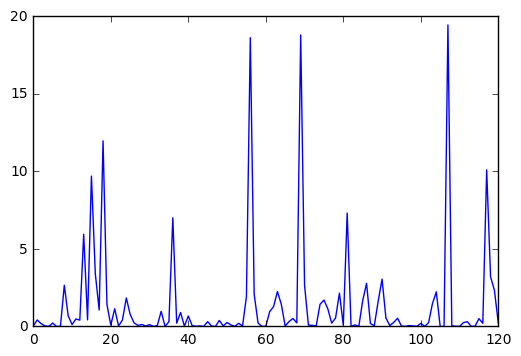

DRACO
vol 1.8081284297520661 44.43
price 2.8730000000000003e-06 4.323000000000001e-06 1.4928065768440286


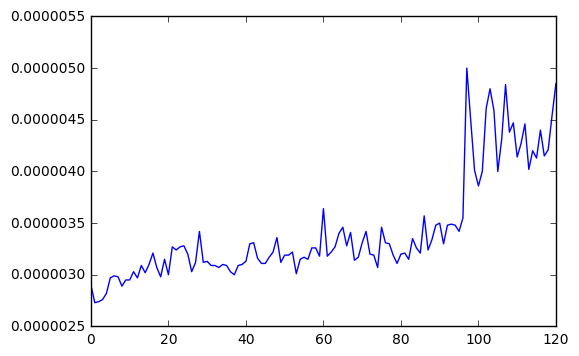

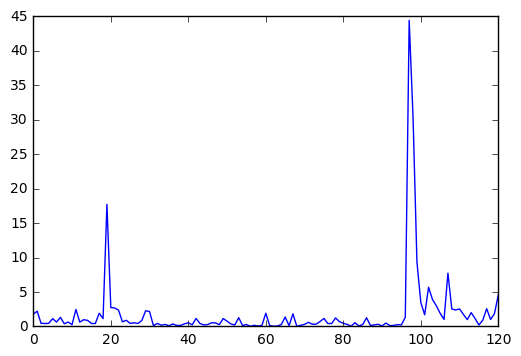

EXP
vol 2.2699317355371895 51.14
price 0.00049546 0.00050173 0.9806104999528725


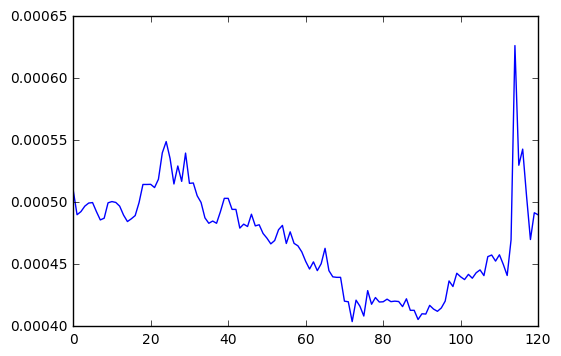

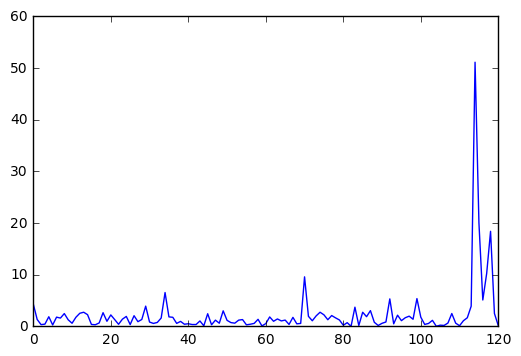

PKB
vol 0.840693447933884 20.96
price 6.0191999999999996e-05 7.2858e-05 1.2018089628907982


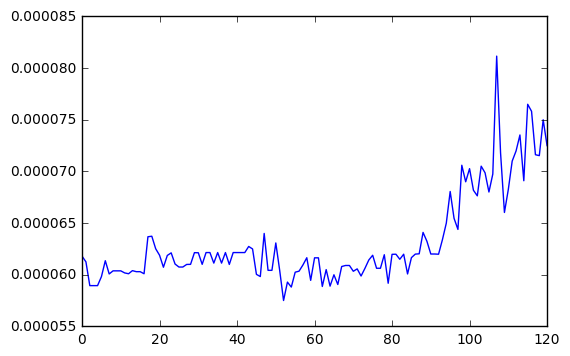

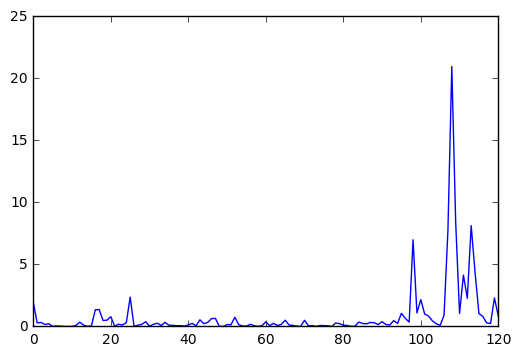

TRUST
vol 0.31254090909090904 6.83
price 1.0064e-05 1.0637e-05 1.036182450508293


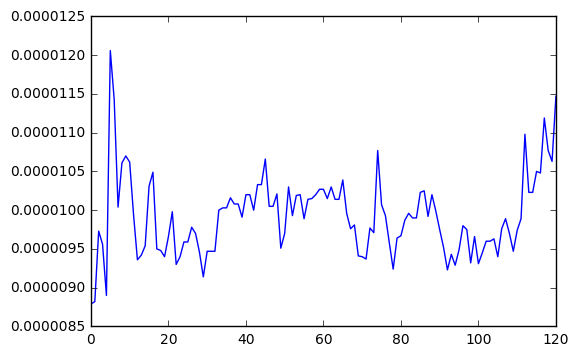

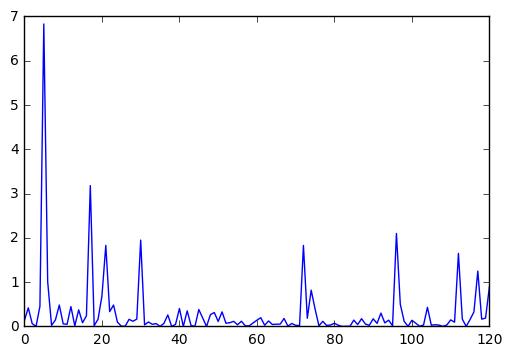

VTC
vol 4.120310743801654 52.77
price 9.2887e-05 0.00012278999999999998 1.3157435927238914


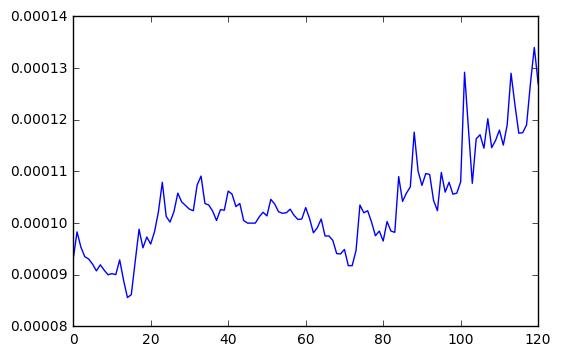

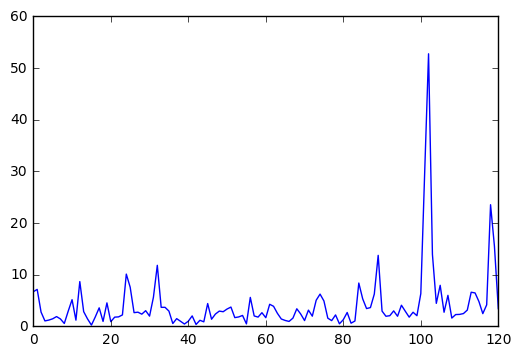

In [190]:
# этот код выводит данные по средним объемам, по максимальному объему, по ценам закрытия и их изменениям, а так же
# отрисовывает цены закрытия и объемы особо интересующих монет
for u in int_urls_h:

        r = requests.get(u)

        df = pd.DataFrame(r.json()['Data'])

        diff = df['close'][-15:].mean() / df['close'][:15].mean()

        print (mostly_interesting[int_urls_h.index(u)])
        print ('vol', df['volumeto'].mean(), df['volumeto'].max())
        print ('price', df['close'][:10].mean(), df['close'][-10:].mean(), diff)


        plt.plot(df['close'])
        plt.show()
        plt.plot(df['volumeto'])
        plt.show()